# Context

In this notebook we will do some exploratory data analysis using bivariate and multivariate analysis

# Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
import os


pd.options.display.max_columns = 100
pd.options.display.max_rows = 100


# Load data

using relative paths

In [3]:
filename = "bivariate_jhonattan.ipynb" # Current file name
print(f'Current file name: {filename}\n')
print(f'Current absolute path: {os.getcwd()}\n')

# Specify the paths, relative to the current file
NOTEBOOKS_DIR = os.path.dirname(os.path.dirname(os.path.abspath(filename)))
BASE_DIR = os.path.dirname(NOTEBOOKS_DIR)
DATA_DIR = os.path.join(BASE_DIR, "Data")
OUTPUT_DIR = os.path.join(DATA_DIR, "output_data")

print(f'BASE_DIR: {BASE_DIR}')
print(f'DATA_DIR: {DATA_DIR}')
print(f'OUTPUT_DIR: {OUTPUT_DIR}')

Current file name: bivariate_jhonattan.ipynb

Current absolute path: c:\Users\jhorea\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\notebooks\bivariate_analysis

BASE_DIR: c:\Users\jhorea\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1
DATA_DIR: c:\Users\jhorea\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data
OUTPUT_DIR: c:\Users\jhorea\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data\output_data


In [4]:
df = pd.read_excel(os.path.join(OUTPUT_DIR,"hallazgos_clean.xlsx" )).iloc[:,1:]
df.head(2)

,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,oficina,zona,regional,distance_to_capital,is_rural,fecha_desembolso,visita_analista_credito,dia_semana_desembolso,dia_mes_desembolso,mes_desembolso,dias_desde_visita_a_desembolso,desembolso_fin_de_semana,desembolso_fin_de_mes,calificacion_cartera,relaciones_laborales,estado,year,tipo,categoria,hallazgo,tipo_hallazgo,riesgo,riesgo_int,riesgo_bin
0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros_servicios_y_negocios,15069268,792642,36,dosquebradas,12,4,10,0,2021-06-11,NaT,4.0,11.0,6.0,NaN,0,0,Si,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,poblado,1,1,5,0,2021-06-15,2021-06-08,1.0,15.0,6.0,7.0,0,0,No,Si,castigo,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1


# Bivariate analysis

## monto v riesgo

In [9]:
# outliers monto

# Q1, Q3 & IQR
Q1 = np.percentile(df.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR 
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

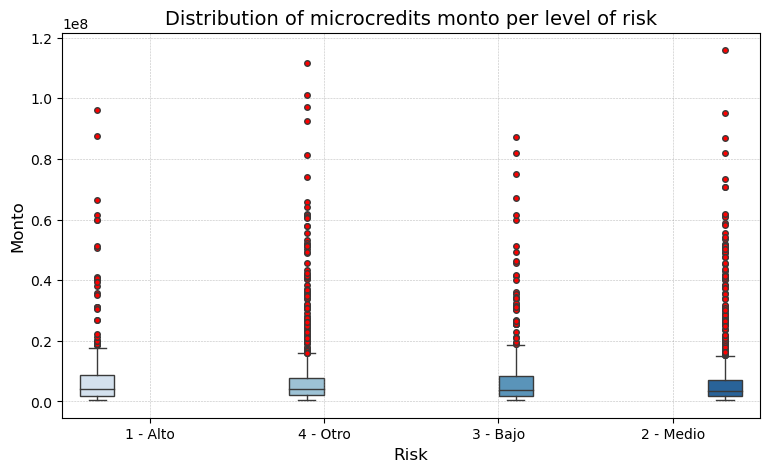

In [10]:
# Boxplot - monto per risk

plt.figure(figsize=(9, 5))
sns.boxplot(x=df['riesgo'], y=df['monto'], palette="Blues", linewidth=1, width=0.8,hue=df['riesgo'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of microcredits monto per level of risk", fontsize=14)
plt.xlabel("Risk", fontsize=12)
plt.ylabel("Monto", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.legend().remove()

plt.show()

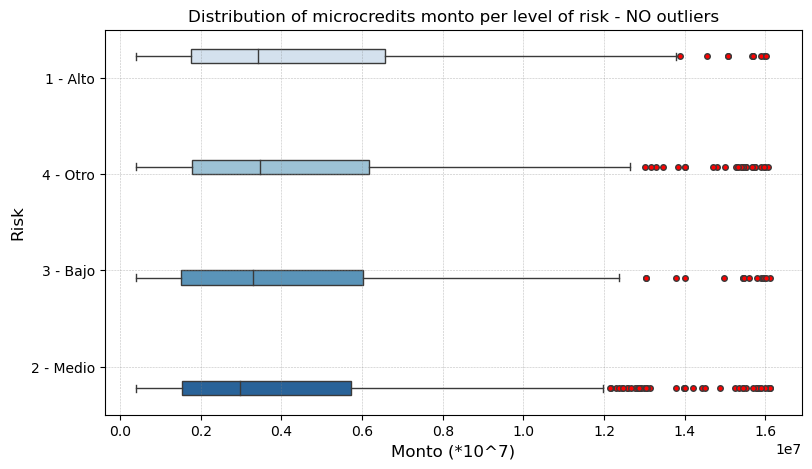

In [11]:
# Boxplot - monto per risk WITHOUT OUTLIERS
temp = df[df["monto"]<upper_limit]

plt.figure(figsize=(9, 5))
sns.boxplot(x=temp['monto'], y=temp['riesgo'], palette="Blues", linewidth=1, width=0.6,hue=temp['riesgo'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of microcredits monto per level of risk - NO outliers", fontsize=12)
plt.xlabel("Monto (*10^7)", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.legend().remove()


plt.show()

## monto v año

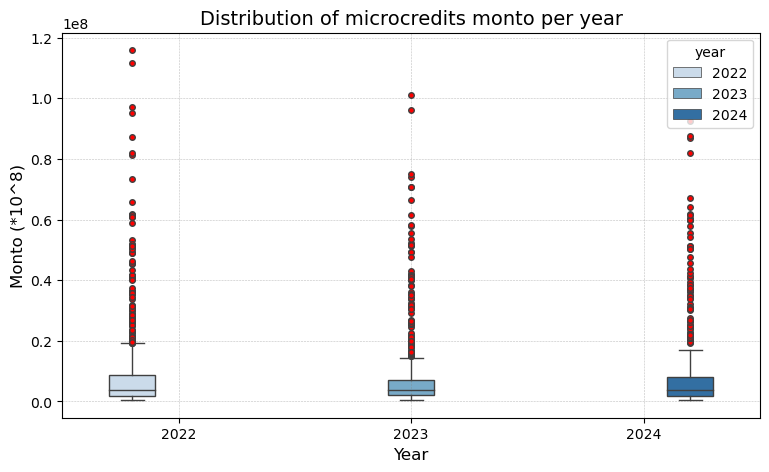

In [7]:
# Boxplot - monto per risk

plt.figure(figsize=(9, 5))
sns.boxplot(x=df['year'], y=df['monto'], palette="Blues", linewidth=1, width=0.6,hue=df['year'],
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))


plt.title("Distribution of microcredits monto per year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Monto (*10^8)", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)


plt.show()

In [6]:
# Lets check the monto per riesgo level

df.groupby(by="year").agg(
    {
        "monto": [
            ("#","count"),
            ("min","min"),
            ("Q 10",lambda x: round(x.quantile(q=0.1),3)),
            ("Promedio", "mean"),
            ("Q 90",lambda x: round(x.quantile(q=0.9),3)),
            ("max","max")
        ]
    }
)

monto                                                        
         #     min       Q 10      Promedio        Q 90        max
year                                                              
2022  1285  400000  1011920.0  8.544114e+06  25685800.0  115832618
2023  1023  400000  1424283.4  7.108125e+06  13699954.0  100983196
2024   608  400000   600000.0  8.508897e+06  21094315.2   92506564